In [1]:
import pandas as pd
import random
import distance
import matplotlib.pyplot as plt
import numpy as np

# read all the files 
hp1 = pd.read_csv('Harry Potter 1.csv', delimiter = ";")
hp2 = pd.read_csv('Harry Potter 2.csv', delimiter = ";")
hp3 = pd.read_csv('Harry Potter 3.csv', delimiter = ";")
film_names = ("Harry Potter and the Philosopher’s Stone", "Harry Potter and the Chamber of Secrets", "Harry Potter and the Prisoner of Azkaban")

# change column names to lower case ones
hp3.columns = ["Character", "Sentence"]

# reprocessing
hp1["Character"] = hp1["Character"].str.lower().str.strip()
hp2["Character"] = hp2["Character"].str.lower().str.strip()
hp3["Character"] = hp3["Character"].str.lower().str.strip()

hp1["Character"].replace("hermoine", "hermione", inplace=True)

In [38]:
def plot_lines():
    # get all the counts
    count_hp1 = hp1["Character"].value_counts()
    count_hp2 = hp2["Character"].value_counts()
    count_hp3 = hp3["Character"].value_counts()
    count_hp1_total = len(hp1["Character"])
    count_hp2_total = len(hp2["Character"])
    count_hp3_total = len(hp3["Character"])
    
    # preprocessing data -> sum up lines after 5 most speaking characters for better visualization
    split_hp1 = np.split(count_hp1, [5])
    split_hp2 = np.split(count_hp2, [5])
    split_hp3 = np.split(count_hp3, [5])
    count_hp1 = pd.concat([split_hp1[0], pd.Series([split_hp1[1].sum()], index=["others"])])
    count_hp2 = pd.concat([split_hp2[0], pd.Series([split_hp2[1].sum()], index=["others"])])
    count_hp3 = pd.concat([split_hp3[0], pd.Series([split_hp3[1].sum()], index=["others"])])
    
    # create plot 
    fig, ax = plt.subplots(nrows = 3, ncols = 1)
    fig.tight_layout()
    
    # customize the plot
    ax[0].set(title='Harry Potter and the Philosopher’s Stone')
    ax[1].set(title='Harry Potter and the Chamber of Secrets')
    ax[2].set(title='Harry Potter and the Prisoner of Azkaban')
    
    # plot the data
    ax[0].pie(count_hp1 / count_hp1_total, labels=count_hp1.index)
    ax[1].pie(count_hp2 / count_hp2_total, labels=count_hp2.index)
    ax[2].pie(count_hp3 / count_hp3_total, labels=count_hp3.index)

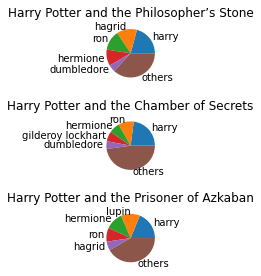

In [39]:
plot_lines()

- function that just returns one plot 
- legend
- total number of lines in the chart 
- same name same colour 

https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py

In [ ]:
def random_quote_hp():
    """"Returns random quote of one of the Harry Potter film scripts and the character that said that"""
    
    # choose a random data set
    dataset = random.choice([hp1, hp2, hp3])
    
    # save in which film the quote occurs
    film = 1 if dataset.equals(hp1) else (2 if dataset.equals(hp2) else 3)
        
    # choose a random line
    line = random.randrange(0, len(dataset))
    
    # save quote and character
    quote = dataset["Sentence"][line]
    character = dataset["Character"][line]
    
    start = True
    end = True 
    # extend quote if possible
    for i in range(1, 4):        
        # extend quote if character says something beforehand
        if(dataset["Character"][line-i] == character and start == True):                
            quote = dataset["Sentence"][line-i] + " " + quote
        else: 
            start = False
    
        # extend quote if character says something afterwards
        if(dataset["Character"][line+i] == character and end == True):
            quote += " " + dataset["Sentence"][line+i]

        else: 
            end = False
           
    return quote, character, film

In [ ]:
def create_quotes(n=10):
    """Creates n random quotes"""
    quotes = []

    # create n random quotes
    for i in range(n): 
        # create random quote 
        q = random_quote_hp()
        
        # ensure sufficient length of the quote -> not less than 5 words
        while(q[0].count(" ") < 5):
            # create random quote 
            q = random_quote_hp()
 
        quotes.append(q)
    
    return quotes

In [ ]:
def answer_evaluation(answer, character):
    # makes checking easier
    answer = answer.lower().strip()
    
    if(len(answer) < 3):
        return False
    
    # check for correct answer
    if(answer == character):
        return True
    
    # answ1er in name
    if((len(answer) > 3) and (answer in character)):
        return True
    
    # spelling mistakes
    if(distance.levenshtein(character, answer) < 4):
        return True
    
    # synominous names
    if((answer and character) in ["draco", "malfoy"]):
        return True
    elif((answer and character) in ["mrs. weasley", "molly", "molly weasley"]):
        return True
    elif((answer and character) in ["mrs. dursley", "aunt petunia", "petunia", "petunia dursley"]):
        return True
    elif((answer and character) in ["aunt marge", "marge", "marjorie dursley", "marjorie eileen dursely"]):
        return True
    elif((answer and character) in ["lord voldemort", "voldemort", "voldemord", "tom riddle", "riddle", "tom"]):
        return True
    elif((answer and character) in ["arthur", "arthur weasley", "mr. weasley"]):
        return True
    
    return False

In [ ]:
def quote_quiz(n=10):
    """Performs the Harry Potter Quote Quiz"""
    
    print(f"""Welcome to the Harry Potter Quote Quiz!

    In the following you will be ask {n} questions. Your task is to guess which character said it. Each correct answer earns you one 
    point. Furthermore, you can get bonus points, if you also know from which movie the quote is. All quotes are from the first 3 movies.  

    Let the test begin!
    """)
    
    score = 0
    bonus = 0
    
    # create amount of quote questions
    quotes = create_quotes(n)
        
    # asks the quote questions and count points
    for q in quotes: 
        answer = input(f"Who said the follwing? \n'{q[0]}'")
        
        if(answer_evaluation(answer, q[1])): 
            print("Your answer was correct!\n")
            score += 1            
        else:
            print(f"Your answer was wrong! Actually, {q[1].title()} said that\n")
        
        film = int(input("Bonus: From which movie is the quote?"))
        
        if(film == q[2]):
            print("Your answer was correct!\n")
            bonus += 1
        else:
            print(f"Your answer was wrong! Actually, the quote is from the movie {film_names[q[2]-1]}.\n")
    
    print(f"Final score: {score} \nBonus points: {bonus}")
    
    return score, bonus

In [ ]:
quote_quiz(10)